In [1]:
import pandas as pd
import numpy as np
from datetime import datetime
import os
import glob
import seaborn as sns
import matplotlib.pyplot as plt
import matplotlib.dates as mdates
import pygraphviz as pgv

In [2]:
df = pd.read_csv("customers_all.csv", index_col='timestamp', parse_dates=True)

In [3]:
df.head()

,customer_no,location,day
timestamp,,,
2019-09-02 07:03:00,1,dairy,Monday
2019-09-02 07:03:00,2,dairy,Monday
2019-09-02 07:04:00,3,dairy,Monday
2019-09-02 07:04:00,4,dairy,Monday
2019-09-02 07:04:00,5,spices,Monday


In [4]:
df.index

DatetimeIndex(['2019-09-02 07:03:00', '2019-09-02 07:03:00',
               '2019-09-02 07:04:00', '2019-09-02 07:04:00',
               '2019-09-02 07:04:00', '2019-09-02 07:04:00',
               '2019-09-02 07:04:00', '2019-09-02 07:04:00',
               '2019-09-02 07:05:00', '2019-09-02 07:05:00',
               ...
               '2019-09-06 21:49:00', '2019-09-06 21:49:00',
               '2019-09-06 21:49:00', '2019-09-06 21:49:00',
               '2019-09-06 21:50:00', '2019-09-06 21:50:00',
               '2019-09-06 21:50:00', '2019-09-06 21:50:00',
               '2019-09-06 21:50:00', '2019-09-06 21:50:00'],
              dtype='datetime64[ns]', name='timestamp', length=24877, freq=None)

In [5]:
df.index.min()

Timestamp('2019-09-02 07:03:00')

In [6]:
df.index.max()

Timestamp('2019-09-06 21:50:00')

In [7]:
df['location'].unique()

array(['dairy', 'spices', 'fruit', 'checkout', 'drinks'], dtype=object)

In [8]:
#Calculate the total number of customers in each section
df.columns

Index(['customer_no', 'location', 'day'], dtype='object')

In [9]:
tot_customers = len(df)

In [10]:
tot_customers

24877

In [11]:
df_cust_distr = pd.DataFrame(df.groupby(by=['location','day']).count())

In [12]:
df_cust_distr

customer_no
location day                   
checkout Friday            1502
         Monday            1437
         Thursday          1532
         Tuesday           1420
         Wednesday         1526
dairy    Friday             932
         Monday             895
         Thursday           965
         Tuesday            911
         Wednesday          976
drinks   Friday             844
         Monday             797
         Thursday           776
         Tuesday            713
         Wednesday          775
fruit    Friday            1057
         Monday            1005
         Thursday          1041
         Tuesday            976
         Wednesday         1043
spices   Friday             790
         Monday             750
         Thursday           790
         Tuesday            694
         Wednesday          730

In [13]:
#Display the number of customers at checkout over time
df_tms = pd.DataFrame(df[df['location']=='checkout'].groupby(by='timestamp').count())

In [14]:
df_tms

,customer_no,location,day
timestamp,,,
2019-09-02 07:05:00,2,2,2
2019-09-02 07:06:00,2,2,2
2019-09-02 07:07:00,1,1,1
2019-09-02 07:08:00,3,3,3
2019-09-02 07:09:00,1,1,1
...,...,...,...
2019-09-06 21:37:00,1,1,1
2019-09-06 21:45:00,1,1,1
2019-09-06 21:47:00,2,2,2


In [15]:
type(df_tms.index)

pandas.core.indexes.datetimes.DatetimeIndex

In [16]:
 df_tms.index

DatetimeIndex(['2019-09-02 07:05:00', '2019-09-02 07:06:00',
               '2019-09-02 07:07:00', '2019-09-02 07:08:00',
               '2019-09-02 07:09:00', '2019-09-02 07:10:00',
               '2019-09-02 07:11:00', '2019-09-02 07:12:00',
               '2019-09-02 07:13:00', '2019-09-02 07:14:00',
               ...
               '2019-09-06 21:30:00', '2019-09-06 21:31:00',
               '2019-09-06 21:32:00', '2019-09-06 21:34:00',
               '2019-09-06 21:35:00', '2019-09-06 21:37:00',
               '2019-09-06 21:45:00', '2019-09-06 21:47:00',
               '2019-09-06 21:48:00', '2019-09-06 21:50:00'],
              dtype='datetime64[ns]', name='timestamp', length=3460, freq=None)

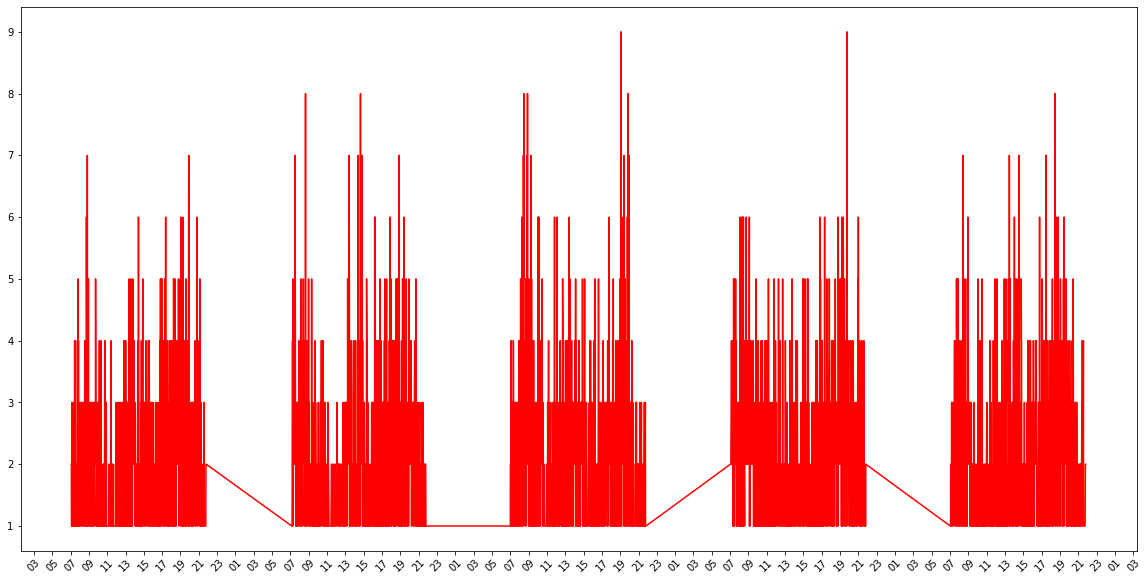

In [17]:
import matplotlib.dates as mdates

fig = plt.figure(figsize=(20,10))
ax = fig.add_subplot(1,1,1)  
plt.plot(df_tms.index, df_tms['customer_no'], c='r')
plt.xticks(rotation=45)

ax.xaxis.set_major_locator(mdates.HourLocator(interval=2))
ax.xaxis.set_major_formatter(mdates.DateFormatter('%H'))
ax.xaxis.set_minor_formatter(mdates.DateFormatter('%y-%m%-%d'))


In [18]:
df1 = df.reset_index()

In [19]:
time_customers = pd.DataFrame(df1.groupby(by=['day', 'customer_no']).agg({'timestamp': ['max','min']}))

In [20]:
time_customers

timestamp                    
                                      max                 min
day       customer_no                                        
Friday    1           2019-09-06 07:05:00 2019-09-06 07:00:00
          2           2019-09-06 07:01:00 2019-09-06 07:00:00
          3           2019-09-06 07:11:00 2019-09-06 07:00:00
          4           2019-09-06 07:02:00 2019-09-06 07:01:00
          5           2019-09-06 07:15:00 2019-09-06 07:01:00
...                                   ...                 ...
Wednesday 1527        2019-09-04 21:47:00 2019-09-04 21:44:00
          1528        2019-09-04 21:48:00 2019-09-04 21:45:00
          1529        2019-09-04 21:49:00 2019-09-04 21:45:00
          1530        2019-09-04 21:49:00 2019-09-04 21:46:00
          1531        2019-09-04 21:49:00 2019-09-04 21:46:00

[7445 rows x 2 columns]

In [21]:
time_customers.dtypes

timestamp  max    datetime64[ns]
           min    datetime64[ns]
dtype: object

In [22]:
time_customers['time_in_sup']=time_customers['timestamp']['max'] - time_customers['timestamp']['min']

In [23]:
time_customers

timestamp                         time_in_sup
                                      max                 min                
day       customer_no                                                        
Friday    1           2019-09-06 07:05:00 2019-09-06 07:00:00 0 days 00:05:00
          2           2019-09-06 07:01:00 2019-09-06 07:00:00 0 days 00:01:00
          3           2019-09-06 07:11:00 2019-09-06 07:00:00 0 days 00:11:00
          4           2019-09-06 07:02:00 2019-09-06 07:01:00 0 days 00:01:00
          5           2019-09-06 07:15:00 2019-09-06 07:01:00 0 days 00:14:00
...                                   ...                 ...             ...
Wednesday 1527        2019-09-04 21:47:00 2019-09-04 21:44:00 0 days 00:03:00
          1528        2019-09-04 21:48:00 2019-09-04 21:45:00 0 days 00:03:00
          1529        2019-09-04 21:49:00 2019-09-04 21:45:00 0 days 00:04:00
          1530        2019-09-04 21:49:00 2019-09-04 21:46:00 0 days 00:03:00
          1531        2019-09-04 21:49:00 2019-09-04 21:46:00 0 days 00:03:00

[7445 rows x 3 columns]

In [24]:
time_customers['time_in_sup'].mean()

Timedelta('0 days 00:06:14.409670920')

In [25]:
time_customers['time_in_sup'].max()

Timedelta('0 days 00:52:00')

In [26]:
time_customers['time_in_sup'].min()

Timedelta('0 days 00:00:00')

### Transition probabilities

In [27]:
df.head()

,customer_no,location,day
timestamp,,,
2019-09-02 07:03:00,1,dairy,Monday
2019-09-02 07:03:00,2,dairy,Monday
2019-09-02 07:04:00,3,dairy,Monday
2019-09-02 07:04:00,4,dairy,Monday
2019-09-02 07:04:00,5,spices,Monday


In [28]:
df.groupby(by=['day','customer_no'])

In [29]:
def customer_locations(df):
    
    locations_list = df.shift(-1)
    return locations_list



df['transitions'] = df.groupby(['day','customer_no'])['location'].transform(customer_locations)

In [30]:
df['transitions'] = df.groupby(['day', 'customer_no'])['location'].shift(-1).fillna('checkout')

In [31]:
df['transitions'].value_counts()

checkout    14862
drinks       2762
dairy        2538
spices       2403
fruit        2312
Name: transitions, dtype: int64

In [32]:
df

,customer_no,location,day,transitions
timestamp,,,,
2019-09-02 07:03:00,1,dairy,Monday,checkout
2019-09-02 07:03:00,2,dairy,Monday,checkout
2019-09-02 07:04:00,3,dairy,Monday,checkout
2019-09-02 07:04:00,4,dairy,Monday,checkout
2019-09-02 07:04:00,5,spices,Monday,checkout
...,...,...,...,...
2019-09-06 21:50:00,1500,dairy,Friday,checkout
2019-09-06 21:50:00,1507,checkout,Friday,checkout
2019-09-06 21:50:00,1508,checkout,Friday,checkout


In [33]:
df['transitions'].unique()

array(['checkout', 'dairy', 'drinks', 'spices', 'fruit'], dtype=object)

In [34]:
df['location'].unique()

array(['dairy', 'spices', 'fruit', 'checkout', 'drinks'], dtype=object)

In [35]:
P=pd.crosstab(df['location'], df['transitions'], normalize='index')

In [36]:
P.to_csv("transition_matrix.csv")

In [37]:
P.index

Index(['checkout', 'dairy', 'drinks', 'fruit', 'spices'], dtype='object', name='location')

In [38]:
P.loc[['dairy']].to_numpy()

array([[0.3930327 , 0.        , 0.22248344, 0.1893567 , 0.19512716]])

### Transitions plot with propabilities

In [39]:
states = ['checkout', 'dairy', 'drinks', 'fruit', 'spices']
G = pgv.AGraph(directed=True)
for state_from in states:
    for state_to in states:
            G.add_edge(state_from, state_to, 
                       label=np.round(P.loc[state_from, state_to],2))


In [40]:
G.draw('transition.png', prog='dot')

In [41]:
times = pd.date_range("07:00:00", "21:30:00", freq="3.0min").strftime("%H:%M:%S")

In [42]:
type(times)

pandas.core.indexes.base.Index

In [43]:
times

Index(['07:00:00', '07:03:00', '07:06:00', '07:09:00', '07:12:00', '07:15:00',
       '07:18:00', '07:21:00', '07:24:00', '07:27:00',
       ...
       '21:03:00', '21:06:00', '21:09:00', '21:12:00', '21:15:00', '21:18:00',
       '21:21:00', '21:24:00', '21:27:00', '21:30:00'],
      dtype='object', length=291)

In [44]:
timestamp = np.random.choice(times)

timestamp

In [45]:
timestamp

'15:24:00'

In [49]:
type(timestamp)

str

In [55]:
from datetime import datetime, timedelta
step = datetime.strptime(timestamp, '%H:%M:%S') + timedelta(minutes = 3)
step.time().strftime("%H:%M:%S")

'15:27:00'

In [8]:
matrix = pd.read_csv("transition_matrix.csv", index_col=0)

In [9]:
matrix

,checkout,dairy,drinks,fruit,spices
location,,,,,
checkout,1.000000,0.000000,0.000000,0.000000,0.000000
dairy,0.393033,0.000000,0.222483,0.189357,0.195127
drinks,0.537260,0.027145,0.000000,0.218950,0.216645
fruit,0.500195,0.237993,0.136080,0.000000,0.125732
spices,0.251998,0.323122,0.272776,0.152104,0.000000


In [11]:
matrix.loc['dairy'].to_numpy().tolist()

[0.3930326992947211,
 0.0,
 0.2224834366317589,
 0.1893567001496046,
 0.1951271639239153]